# Problem statement

The Windy Postman Problem (WPP) (Minieka, 1979) is defined as follows: You are given a connected undirected graph $G = (V, E)$. For each edge $e = (x, y) \in E$, the distance from $x$ to $y$ can be different from the distance from $y$ to $x$. In other words, the length of an edge depends on the direction in which it is traversed.

The goal is to find a shortest directed closed walk $p$ on $G$ such that $p$ contains each edge $e \in E$ at least once.


Conditions:

1. $\min \sum_{(i,j)\in E} (c_{ij}) x_{ij} + c_{ji}x_{ji}$ 
2. $\forall (i,j) \in E : x_{ij} + _{ji} \ge 1$ every edge at elast once
3. $\forall i \in V : $ enfroce symmetric graph
4. weights greater than 0


links

- http://akira.ruc.dk/~keld/research/LKH/LKH-2.0/DOC/LKH_REPORT.pdf on page 61
- https://conferences.mpi-inf.mpg.de/adfocs-15/material/Ola-Lect3.pdf
- https://conferences.mpi-inf.mpg.de/adfocs-15/material/Ola-Lect2.pdf


paper: https://www.uv.es/sestio/TechRep/tr05-07.pdf


In [27]:
!pip install ortools

You should consider upgrading via the '/home/daniel/Development/PSSAI_G15/venv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
from pathlib import Path
import re
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as approx


In [93]:
for (node1,node2,edge_attr) in G.edges(data=True):
    if weighted_edges[0]['weight']==weight]

OutMultiEdgeDataView([(1, 2, {'weight': 17}), (1, 13, {'weight': 35}), (2, 1, {'weight': 16}), (2, 3, {'weight': 11}), (2, 14, {'weight': 18}), (13, 1, {'weight': 15}), (13, 12, {'weight': 15}), (13, 14, {'weight': 7}), (3, 2, {'weight': 8}), (3, 4, {'weight': 1}), (3, 5, {'weight': 4}), (14, 2, {'weight': 3}), (14, 6, {'weight': 11}), (14, 12, {'weight': 9}), (14, 13, {'weight': 5}), (4, 3, {'weight': 3}), (4, 5, {'weight': 7}), (5, 3, {'weight': 3}), (5, 4, {'weight': 5}), (5, 6, {'weight': 2}), (5, 7, {'weight': 3}), (6, 5, {'weight': 14}), (6, 7, {'weight': 2}), (6, 14, {'weight': 14}), (7, 5, {'weight': 2}), (7, 6, {'weight': 2}), (7, 8, {'weight': 12}), (8, 7, {'weight': 8}), (8, 9, {'weight': 6}), (8, 12, {'weight': 18}), (9, 8, {'weight': 2}), (9, 10, {'weight': 6}), (9, 11, {'weight': 26}), (9, 12, {'weight': 8}), (12, 8, {'weight': 20}), (12, 9, {'weight': 14}), (12, 13, {'weight': 9}), (12, 14, {'weight': 6}), (10, 9, {'weight': 7}), (10, 11, {'weight': 11}), (11, 9, {'weigh

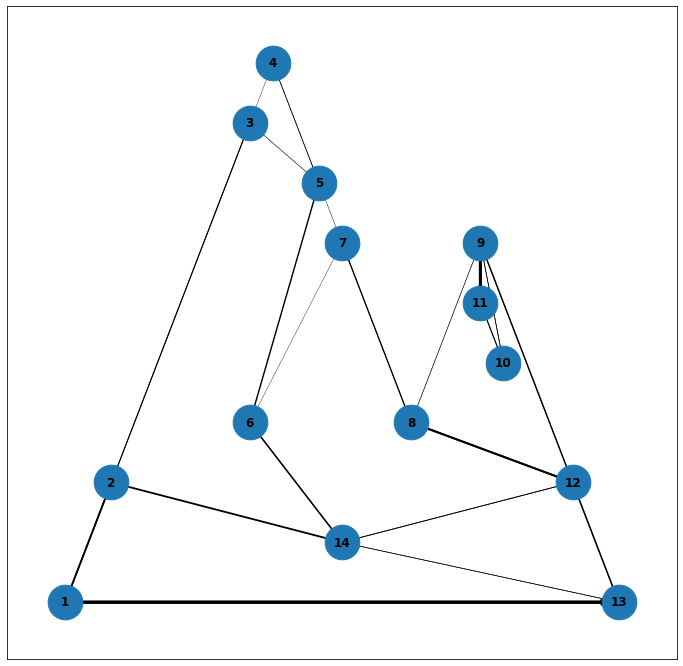

<Figure size 432x288 with 0 Axes>

In [28]:
def parse_data_file(filename: str): 
    assert Path(filename).exists()
    g = nx.MultiDiGraph()
    with open(filename) as f:
        # skip until edges and weights
        for _ in range(6):
             f.readline()
                
        # get all relevant lines
        lines = [l for l in f.readlines()]
        end = lines.index("\n")
        lines = lines[:end]

        # split line, add to graph
        for l in lines:
            x = l.strip().split("      ")
            v = re.findall("\d+", x[0])
            v1, v2 = [int(x) for x in v]
            w1, w2 = int(x[-2]), int(x[-1])
            g.add_edge(v1, v2, weight=w1)
            g.add_edge(v2, v1, weight=w2)
    return g

G = parse_data_file("instances/toy")

# verticies
pos = nx.planar_layout(G)
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx_nodes(G, pos,  node_size=1200)
nx.draw_networkx_labels(G, pos, font_weight="bold")
  

# weights
all_weights = []
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight']) 

unique_weights = list(set(all_weights))

for weight in unique_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    width = weight*len(G.adj.keys())*3.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)

    weights = []
    for (node1,node2,edge_attr) in G.edges(data=True):
        if node1==weighted_edges[0][0] and node2==weighted_edges[0][1]:
            weights.append(str(edge_attr["weight"]))
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

plt.show()
plt.savefig("graph_toy")

In [126]:
help(nx.draw_networkx)

Help on function draw_networkx in module networkx.drawing.nx_pylab:

draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
    Draw the graph G using Matplotlib.
    
    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.
    
    Parameters
    ----------
    G : graph
        A networkx graph
    
    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.
    
    arrows : bool or None, optional (default=None)
        If `None`, directed graphs draw arrowheads with
        `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
        via `~matplotlib.collections.LineCollection` for speed.
        If `True`, draw arrowheads with

In [123]:
A = nx.DiGraph()

In [124]:
A.add_edge(1,2)

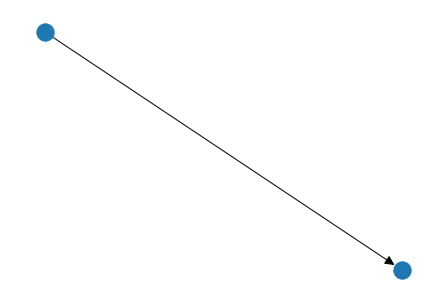

In [127]:
nx.draw(A, arrowsize=20)

In [132]:
A = nx.DiGraph()
for a,b in nx.eulerian_circuit(G):
    A.add_edge(a, b)

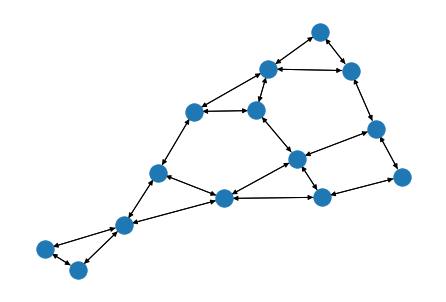

In [134]:
pos = nx.circular_layout(G)
nx.draw(A, arrowsize=10, p)

In [115]:
help(nx.euler)

Help on module networkx.algorithms.euler in networkx.algorithms:

NAME
    networkx.algorithms.euler - Eulerian circuits and graphs.

FUNCTIONS
    eulerian_circuit(G, source=None, keys=False)
        Returns an iterator over the edges of an Eulerian circuit in `G`.
        
        An *Eulerian circuit* is a closed walk that includes each edge of a
        graph exactly once.
        
        Parameters
        ----------
        G : NetworkX graph
           A graph, either directed or undirected.
        
        source : node, optional
           Starting node for circuit.
        
        keys : bool
           If False, edges generated by this function will be of the form
           ``(u, v)``. Otherwise, edges will be of the form ``(u, v, k)``.
           This option is ignored unless `G` is a multigraph.
        
        Returns
        -------
        edges : iterator
           An iterator over edges in the Eulerian circuit.
        
        Raises
        ------
        Netw

In [30]:
def create_data_model():
    data = {}
    data["distance_matrix"] = parse_data_file("instances/toy").adj
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data

In [31]:

def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))


In [33]:
data = create_data_model()

manager = pywrapcp.RoutingIndexManager(len(data["distance_matrix"].keys()), data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

# Create and register a transit callback.
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    cb = data['distance_matrix'][from_node][to_node][0]["weight"]
    #print(from_node, to_node, cb)
    return cb


transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

 # Add Distance constraint.
#dimension_name = 'Distance'
#routing.AddDimension(
#        transit_callback_index,
#        0,  # no slack
#        3000,  # vehicle maximum travel distance
#        True,  # start cumul to zero
#        dimension_name)
#distance_dimension = routing.GetDimensionOrDie(dimension_name)
#distance_dimension.SetGlobalSpanCostCoefficient(100)


# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
if solution:
    print_solution(data, manager, routing, solution)
else:
    print('No solution found !')


Objective: 0
Route for vehicle 0:
 0 ->  13 ->  12 ->  11 ->  10 ->  9 ->  8 ->  7 ->  6 ->  5 ->  4 ->  3 ->  2 ->  1 -> 0
Distance of the route: 0m

Maximum of the route distances: 0m


In [34]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True


    # Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
if solution:
    print_solution(data, manager, routing, solution)
else:
    print('No solution found !')


Objective: 0
Route for vehicle 0:
 0 ->  13 ->  12 ->  11 ->  10 ->  9 ->  8 ->  7 ->  6 ->  5 ->  4 ->  3 ->  2 ->  1 -> 0
Distance of the route: 0m

Maximum of the route distances: 0m


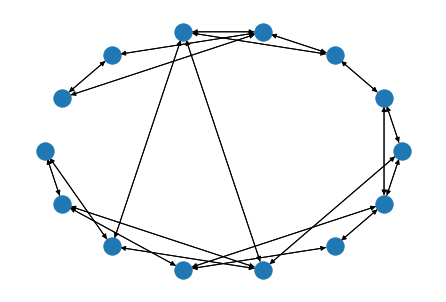

In [43]:
nx.draw_shell(G)

In [41]:
approx.greedy_tsp(G.to_directed())

NetworkXError: G must be a complete graph.

# notes

link: https://sci-hub.ru/https://doi.org/10.1016/0305-0548(94)90079-5

Goal: Minimize $\sum_{(i,j) \in E} (c_{ij}x_{ij}+c_{ji}x_{ji})$

Condtions

$\forall (i,j) \in E : x_{ij} + _{ji} \ge 1$ every edge at elast once

$\sum_{(i,j)}$ force the (directed) graph represented by the tour to be symmetric. 

values above 0

values are integer



## **Wins algorithm**

**Phase I** - Transform G into an Eulerian Graph



In [46]:
nx.is_eulerian(G)

True

**Phase II** - Solve the WPP optimally over G

step 1: pick arc direction with lower or equal weight

In [60]:
G2 = G.copy()

In [61]:
for edge in G2.edges():
    print(f'{edge} - w: {G.get_edge_data(*edge)[0]["weight"]}')

(1, 2) - w: 17
(1, 13) - w: 35
(2, 1) - w: 16
(2, 3) - w: 11
(2, 14) - w: 18
(13, 1) - w: 15
(13, 12) - w: 15
(13, 14) - w: 7
(3, 2) - w: 8
(3, 4) - w: 1
(3, 5) - w: 4
(14, 2) - w: 3
(14, 6) - w: 11
(14, 12) - w: 9
(14, 13) - w: 5
(4, 3) - w: 3
(4, 5) - w: 7
(5, 3) - w: 3
(5, 4) - w: 5
(5, 6) - w: 2
(5, 7) - w: 3
(6, 5) - w: 1
(6, 7) - w: 2
(6, 14) - w: 14
(7, 5) - w: 2
(7, 6) - w: 2
(7, 8) - w: 12
(8, 7) - w: 8
(8, 9) - w: 6
(8, 12) - w: 18
(9, 8) - w: 2
(9, 10) - w: 6
(9, 11) - w: 26
(9, 12) - w: 8
(12, 8) - w: 20
(12, 9) - w: 14
(12, 13) - w: 9
(12, 14) - w: 6
(10, 9) - w: 7
(10, 11) - w: 11
(11, 9) - w: 30
(11, 10) - w: 5


In [80]:
# could be better, checks every edge direction twice but is not needed
for edge in G2.edges():
    w1 = G2.get_edge_data(*edge)[0]["weight"]
    w2 = G2.get_edge_data(*edge[::-1])[0]["weight"]
    if w1 < w2:
        G2.remove_edge(*edge[::-1])

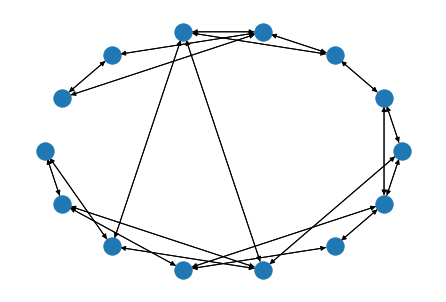

In [82]:
nx.draw_shell(G)

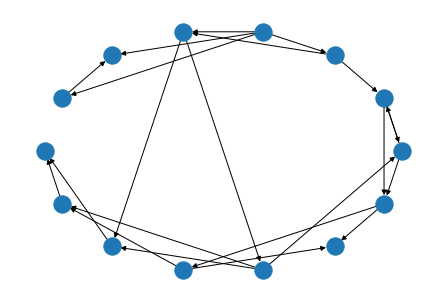

In [81]:
nx.draw_shell(G2)

step 2: 